In [2]:
# Importing the necessary packages

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [3]:
# Import the data

url = 'https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt'
df = pd.read_csv(url)

In [4]:
df.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [5]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000


## EDA

In [7]:
df.shape

(645, 7)

In [8]:
df.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [9]:
# Missing value Analysis

df.isnull().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

## Data Visualization

C:\Users\manis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Total floors in the house')

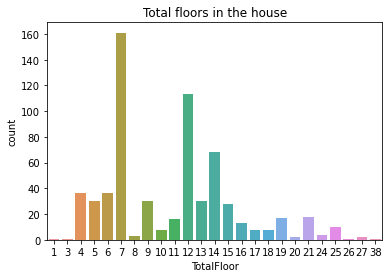

In [10]:
sns.countplot(df['TotalFloor'])
plt.title('Total floors in the house')

C:\Users\manis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Numbers of bedroom in house')

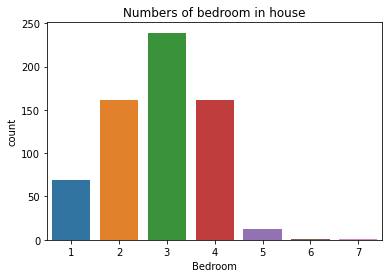

In [11]:
sns.countplot(df['Bedroom'])
plt.title('Numbers of bedroom in house')

C:\Users\manis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Numbers of living room in house')

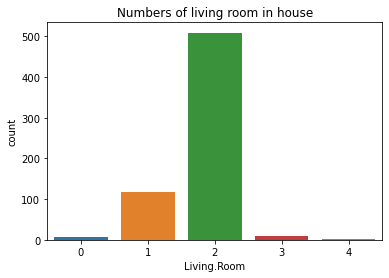

In [12]:
sns.countplot(df['Living.Room'])
plt.title('Numbers of living room in house')

C:\Users\manis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Numbers of bathroom in house')

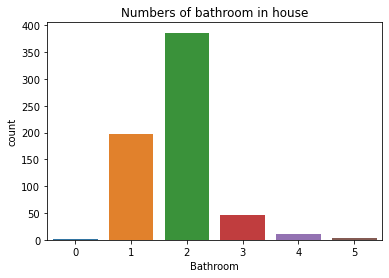

In [13]:
sns.countplot(df['Bathroom'])
plt.title('Numbers of bathroom in house')

C:\Users\manis\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Price of the house')

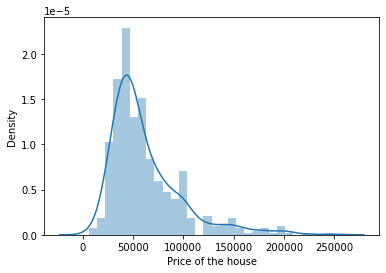

In [14]:
sns.distplot(df['Price'])
plt.xlabel('Price of the house')

<AxesSubplot:ylabel='Price'>

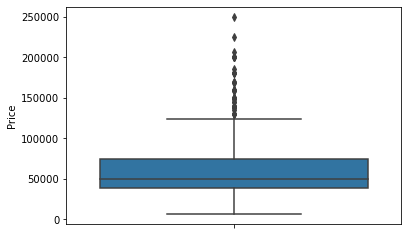

In [15]:
sns.boxplot(y = df['Price'])

In [16]:
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000


In [17]:
data = df[['Sqft','Floor','Bedroom' , 'TotalFloor','Living.Room' , 'Bathroom']]
target = df['Price']

In [18]:
data.head()

,Sqft,Floor,Bedroom,TotalFloor,Living.Room,Bathroom
0,1177.698,2,2,7,2,2
1,2134.800,5,4,7,2,2
2,1138.560,5,2,7,2,1
3,1458.780,2,3,7,2,2
4,967.776,11,3,14,2,2


In [20]:
target.head()

0    62000
1    78000
2    58000
3    45000
4    45000
Name: Price, dtype: int64

### Preprocessing and scaling the features

In [21]:
from sklearn.preprocessing import RobustScaler
transformer1 = RobustScaler().fit(data)
data = transformer1.transform(data)
data = pd.DataFrame(data, columns= ['Sqft','Floor', 'Bedroom' , 'TotalFloor','Living.Room' , 'Bathroom'])

In [22]:
data.head()

,Sqft,Floor,Bedroom,TotalFloor,Living.Room,Bathroom
0,-0.253676,-0.6,-0.5,-0.714286,0.0,0.0
1,0.735294,0.0,0.5,-0.714286,0.0,0.0
2,-0.294118,0.0,-0.5,-0.714286,0.0,-1.0
3,0.036765,-0.6,0.0,-0.714286,0.0,0.0
4,-0.470588,1.2,0.0,0.285714,0.0,0.0


In [23]:
target.head()

0    62000
1    78000
2    58000
3    45000
4    45000
Name: Price, dtype: int64

## Model Building

In [24]:
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.25, random_state=5)

In [27]:
reg_model = KNeighborsRegressor(n_neighbors=5)

In [28]:
reg_model.fit(data_train, target_train)

KNeighborsRegressor()

In [29]:
house_pred = reg_model.predict(data_test)


In [41]:
# calculating RMSE

from sklearn.metrics import mean_squared_error
from math import sqrt

error = sqrt(mean_squared_error(target_test, house_pred))

print("RMSE value is : ", error)

RMSE value is :  22034.681648295456


In [42]:
# error for different values of k

rmse_val = []

k_value = []

for i in range(1,30):
    fin_model = KNeighborsRegressor(n_neighbors=i)

    fin_model.fit(data_train, target_train)

    pred = fin_model.predict(data_test)

    error_new = sqrt(mean_squared_error(target_test, pred))

    rmse_val.append(error_new)

    k_value.append(i)

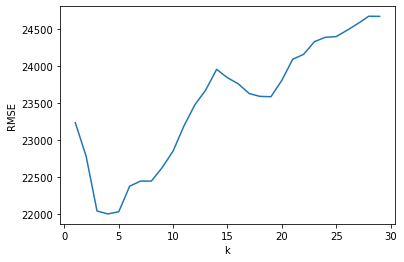

In [45]:
error_data = pd.DataFrame(list(zip(k_value,rmse_val)), columns=["k", "RMSE"])

sns.lineplot(x= "k", y= "RMSE", data=error_data)

plt.show()

In [47]:
error_data.head(7)

,k,RMSE
0,1,23239.354898
1,2,22783.430172
2,3,22044.541563
3,4,22005.460652
4,5,22034.681648
5,6,22380.379701
6,7,22449.118549


In [48]:
# we see that rmse value is minimum for k = 4

# Final model with k = 4

fin_model = KNeighborsRegressor(n_neighbors=4)

fin_model.fit(data_train, target_train)

pred = fin_model.predict(data_test)

error_new = sqrt(mean_squared_error(target_test, pred))

print("RMSE value of model is : ", error_new)


RMSE value of model is :  22005.46065234697
